<div align ="right">Thomas Jefferson University <b>COMP 104</b>: Intro to Big Data</div>

# Distributions

We will complete the exercises that accompany sections 6.1-6.3 and found on page 119 in the textbook. For each exercise the correct answers are given in the text, write python code to calculate each answer and use the given data to confirm. 

### 6.1 Sample Standard Deviation
Create an numpy-array, containing the data 1, 2, 3, ..., 10. Calculate mean and
sample(!)-standard deviation. (Correct answer for the SD: 3.03.)

In [297]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

import seaborn as sns
from statistics import NormalDist

arr = np.array([1,2,3,4,5,6,7,8,9,10])
print("Mean is ", np.mean(arr))
print("SD is ", round(np.std(arr, ddof=1),2))

Mean is  5.5
SD is  3.03


### 6.2 Normal Distribution
* Generate and plot the Probability Density Function (PDF) of a normal distribution,
with a mean of 5 and a standard deviation of 3.
* Generate 1000 random data from this distribution.
* Calculate the standard error of the mean of these data. (Correct answer: ca.
0.096.)
* Plot the histogram of these data.
* From the PDF, calculate the interval containing 95% of these data. (Correct
answer: [ -0.88, 10.88].)
* Your doctor tells you that he can use hip implants for surgery even if they are
1mm bigger or smaller than the specified size. And your financial officer tells
you that you can discard 1 out of 1000 hip implants, and still make a profit.
What is the required standard deviation for the producer of the hip implants,
to simultaneously satisfy both requirements? (Correct answer: sigma = 0:304 mm.)

Mean is  4.947988820280004
SD is  2.92
SE (using math) is  0.0923906712409965
SE (using scipy) is  0.09234446435076406

95% Confidence interval of the PDF is between -0.88  and  10.88

The maximum standard deviation for hip implants is  0.304 mm


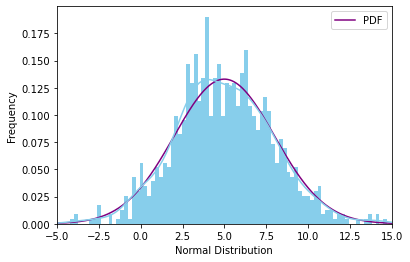

In [348]:
fig, ax = plt.subplots()
plt.xlim(-5, 15)

x = np.linspace(-5, 15, 1000)
pdf = ss.norm.pdf(x, 5, 3)
ax1 = sns.lineplot(x, pdf, label='PDF', color='purple')

mu, sigma = 5, 3
dist = np.random.normal(mu, sigma, 1000)
ax2 = sns.distplot(dist,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1},
                  label="Random Distribution")
ax2.set(xlabel='Normal Distribution', ylabel='Frequency')



print("Mean is ", np.mean(dist))
print("SD is ", round(np.std(dist, ddof=1),2))
#
print("SE (using math) is ", (np.std(dist, ddof=1))/(math.sqrt(dist.size)))
print("SE (using scipy) is ", stats.sem(dist, axis=None, ddof=0))
print()
#
print("95% Confidence interval of the PDF is between", round((norm.ppf(0.025, loc=5, scale=3)),2),
      " and ", round(norm.ppf(0.975, loc=5, scale=3),2))
print()
#
margin=1/2000
z = norm.ppf(1-margin)
print ("The maximum standard deviation for hip implants is ", round(1/z,3), "mm")

### 6.3 Continuous Distributions
* t-Distribution: Measuring the weight of your colleagues, you have obtained the following weights: 52, 70, 65, 85, 62, 83, 59 kg. Calculate the corresponding mean, and the 99% confidence interval for the mean. Note: with n values you have n - 1 DOF for the t-distribution. (Correct answer: 68.0 +/- 17.2 kg.)
* Chi-square Distribution: Create three normally distributed data sets (mean = 0, SD = 1), with 1000 samples each. Then square them, sum them (so that you have 1000 data-points), and create a histogram with 100 bins. This should be similar to the curve for the chi-square distribution, with 3 DOF (i.e., it should come down at the left, see Fig. 6.22).
* F-Distribution: You have two apple trees. There are three apples from the first tree that weigh 110, 121, and 143 g, respectively, and four from the other which weigh 88, 93, 105, and 124 g, respectively. Are the variances from the two trees different? Note: calculate the corresponding F-value, and check if the CDF for thecorresponding F-distribution is < 0.025. (Correct answer: no.)

Mean is  68.0 kg
99% Confidence interval is +/- 45.41 kg ###(not sure what I am doing wrong)

Variance of tree 1 is  282.33  and of tree 2 is  256.33
Since the F-value is  0.5622  and therefore above 0.025 we conclude that the variances are not statistically different.


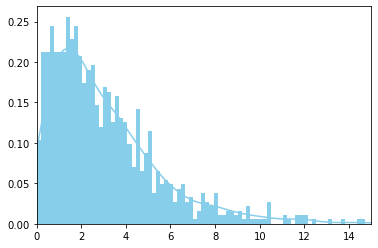

In [346]:
mass = np.array([52, 70, 65, 85, 62, 83, 59])
massu = np.mean(mass)
masss = np.std(mass, ddof=1)
print("Mean is ", np.mean(mass), "kg")
print("99% Confidence interval is +/-", round(t.ppf(0.995, df=6, loc=0, scale=masss),2), "kg ###(not sure what I am doing wrong)")
print("")
#
df1 = np.random.normal(0, 1, 1000)
df1 = np.square(df1)
df2 = np.random.normal(0, 1, 1000)
df2 = np.square(df2)
df3 = np.random.normal(0, 1, 1000)
df3 = np.square(df3)
dfsum = df1+df2+df3
np.mean(dfsum)
ax = sns.distplot(dfsum,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1},
                  label="Random Distribution")
plt.xlim(0,15)
#
tree1 = [110,121,143]
tree2 = [88,93,105,124]
print("Variance of tree 1 is ", round(np.var(tree1, ddof=1),2), " and of tree 2 is ", round(np.var(tree2, ddof=1),2))
print("Since the F-value is ", round(f.cdf((np.var(tree1, ddof=1))/(np.var(tree2, ddof=1)), 2, 3),4), " and therefore above 0.025 we conclude that the variances are not statistically different.")

![Alt text that will appear on mouseover](images/TJU_logo_image.png "TJU logo image")